In [8]:
import numpy as np
import pandas as p

import scipy.stats as sp
import matplotlib.pyplot asscipy

In [9]:
T = 2
N = T*250

## 4 (a) Brownian motion & Stock price simulations

In [ ]:
class StockSimulator():
    def __init__()

In [3]:
np.random.seed(42)

def time_grid(T,N):
    # T = time horizon
    # N = number of steps (T*250 for daily convention)
    dt = T/N # time step
    return np.arange(0,T + dt,dt) # time grid

def brownian_sim(T, N):
    # T = time horizon
    # N = number of steps (T*250 for daily convention)
    dt = T/N # time step
    white_noise = np.sqrt(dt) * np.random.normal(loc = 0, scale = 1.0, size = N)
    output = np.append(0, np.cumsum(white_noise, axis = 0))
    return white_noise, output

def stock_sim(S0, T, N, sigma):
    # S0 = initial stock price
    # T = time horizon
    # N = number of steps
    # sigma = volatility
    _ , brownian = brownian_sim(T,N) # time step, _ , brownian simulation
    time = time_grid(T,N) # time grid
    stock = np.full(N + 1, S0, dtype = float)
    stock = S0 * np.exp(sigma * brownian -  (sigma**2 * time) / 2)
    return stock

Text(0, 0.5, 'Stock Price')

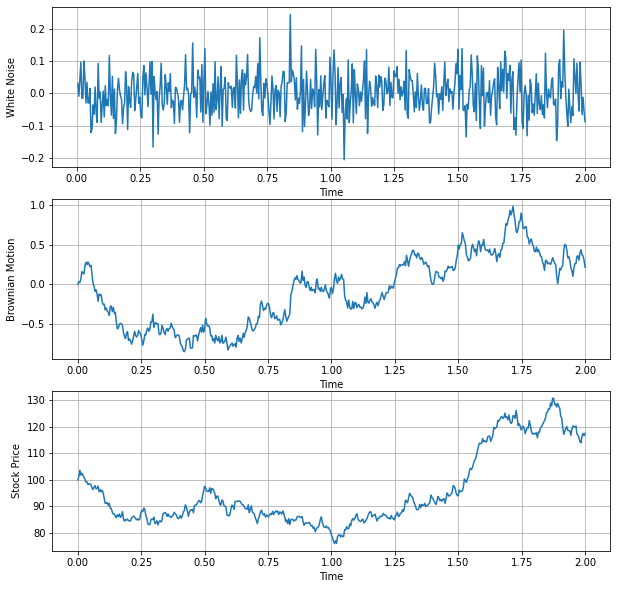

In [4]:
# create timegrid
time = time_grid(T = 2, N = 500)
# generate simulations
white_noise, brownian = brownian_sim(T = 2, N = 500)
# simulate stock price
stock_price = stock_sim(S0 = 100, T = 2, N = 500, sigma = 0.2)

# plot the results
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,10))
ax1.plot(time[1:],white_noise)
ax1.grid()
ax1.set_xlabel('Time')
ax1.set_ylabel('White Noise')
ax2.plot(time,brownian)
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('Brownian Motion')
ax3.plot(time,stock_price)
ax3.grid()
ax3.set_xlabel('Time')
ax3.set_ylabel('Stock Price')

## 4 (b) European Call Option

In [5]:
def d_plus(x,K,T,t,sigma):
    denom = sigma * np.sqrt(T-t) 
    return (np.log(x/K) + (sigma**2 / 2) * (T-t)) / denom

def d_minus(x,K,T,t,sigma):
    denom = sigma * np.sqrt(T-t) 
    return (np.log(x/K) - (sigma**2 / 2) * (T-t)) / denom

def eu_call_price(x,K,T,t,sigma):
    d1 = d_plus(x,K,T,t,sigma)
    d2 = d_minus(x,K,T,t,sigma)
    return sp.norm.cdf(d1) * x - K * sp.norm.cdf(d2) 

def eu_call_hedge(x,K,T,t,sigma):
    d1 = d_plus(x,K,T,t,sigma)
    return sp.norm.cdf(d1)

/home/coinflip/anaconda3/envs/stoch/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/coinflip/anaconda3/envs/stoch/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


Text(0, 0.5, 'European Call Option Hedging Position')

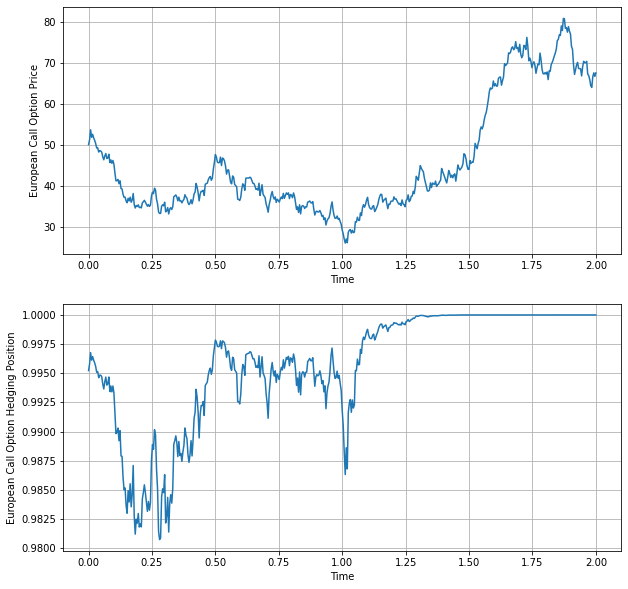

In [6]:
# create time grid
time = time_grid(2,N = 2*250)
# generate European Call Option price and hedging postion
euc_price = eu_call_price(x = stock_price, K = 50, T = 2, t = time, sigma = 0.2)
euc_hedge = eu_call_hedge(x = stock_price, K = 50, T = 2, t = time, sigma = 0.2)

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,10))
ax1.plot(time,euc_price)
ax1.grid()
ax1.set_xlabel('Time')
ax1.set_ylabel('European Call Option Price')
ax2.plot(time,euc_hedge)
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('European Call Option Hedging Position')

Text(0, 0.5, 'Hedging')

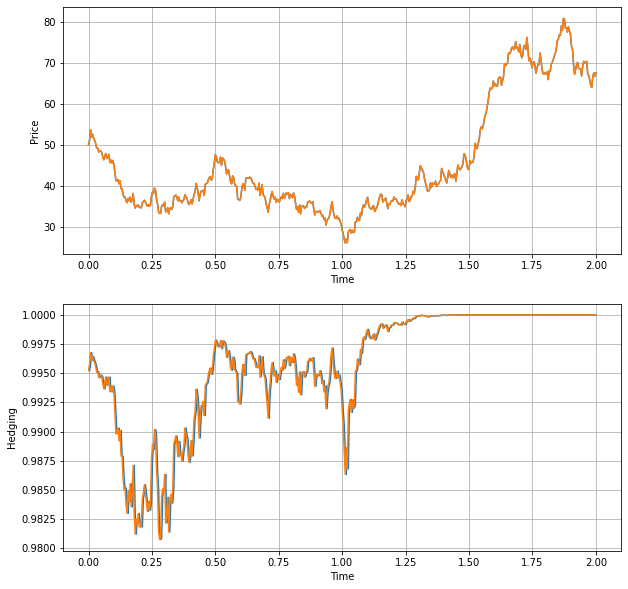

In [7]:
initial_price = eu_call_price(x = stock_price[0], K = 50, T = 2, t = 0, sigma = 0.2)
portfolio = np.full(N + 1, initial_price, dtype=float)
hedge = np.zeros(N, dtype = float)

for i in range(N):
    hedge[i] = eu_call_hedge(x = stock_price[i], K = 50, T = 2, t = time[i], sigma = 0.2)
    portfolio[i+1] = portfolio[i] + hedge[i] * (stock_price[i+1] - stock_price[i])

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,10))
ax1.plot(time,portfolio)
ax1.plot(time,euc_price)
ax1.grid()
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax2.plot(time[1:],hedge)
ax2.plot(time,euc_hedge)
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('Hedging')

## 4 (c)  European Call Option with Dividend and Interest Rate

In [ ]:
def nominal_price(price, time, r):
    return price * np.exp(r*time)
    
def d_plus_ir(x,K,T,t,sigma,r):
    denom = sigma * np.sqrt(T-t) 
    return (np.log(x/K) + (r + sigma**2 / 2) * (T-t)) / denom

def d_minus_ir(x,K,T,t,sigma,r):
    denom = sigma * np.sqrt(T-t) 
    return (np.log(x/K) + (r - sigma**2 / 2) * (T-t)) / denom

def eu_call_price_ir(x,K,T,t,sigma,r):
    d1 = d_plus_ir(x,K,T,t,sigma,r)
    d2 = d_minus_ir(x,K,T,t,sigma,r)
    return sp.norm.cdf(d1) * x - K * np.exp(-r * (T-t)) * sp.norm.cdf(d2) 

def eu_call_hedge_ir(x,K,T,t,sigma,r):
    d1 = d_plus_ir(x,K,T,t,sigma,r)
    return sp.norm.cdf(d1)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'European Call Option Hedging Position')

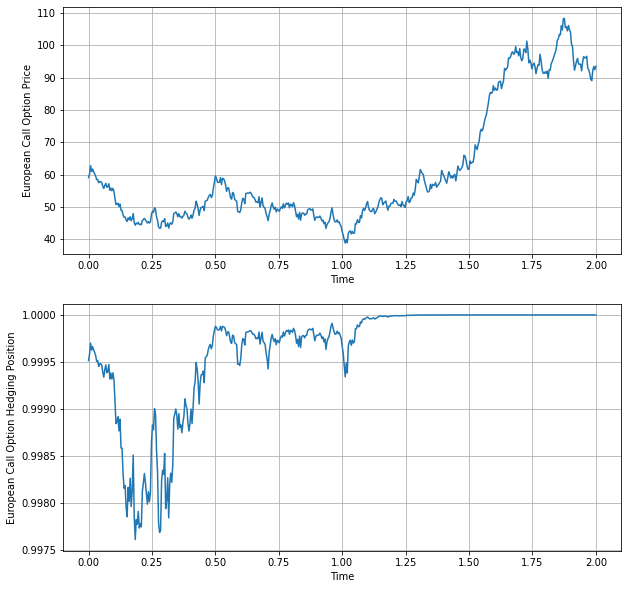

In [ ]:
# create time grid
time = time_grid(2,N = 2*250)
# create nominal stock price
stock_price_nominal = nominal_price(price = stock_price, time = time, r = 0.1)
# generate European Call Option price and hedging postion with IR
euc_price_ir = eu_call_price_ir(x = stock_price_nominal, K = 50, T = 2, t = time, sigma = 0.2, r = 0.1)
euc_hedge_ir = eu_call_hedge_ir(x = stock_price_nominal, K = 50, T = 2, t = time, sigma = 0.2, r = 0.1)

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,10))
ax1.plot(time,euc_price_ir)
ax1.grid()
ax1.set_xlabel('Time')
ax1.set_ylabel('European Call Option Price')
ax2.plot(time,euc_hedge_ir)
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('European Call Option Hedging Position')